**In this assignment, you'll get to practice the concepts and skills covered in the first module (Module 1). The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques that were described in the theory portion of the lecture..**



**Guidelines**
* Download `ShakespeareSonnets.txt` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 1 - Text Representation (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

# Question 1: Reading the dataset 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `ShakespeareSonnets.txt` into a sting called `sonnets` and perform the following: 

> **Q1.1.** Tokenize the text into individual words or individual tokens and store the result into a variable called `text_tokens`. Make sure to ignore the punctuation characters. Then print the results.

> **Q1.2.** Tokenize the text into individual sentences. Then print the results.

> **Q1.3.**  Encode `text_tokens` using One-Hot Encoding approach and store the encoded tokens into a Dataframe called `one_hot_df`.

> **Q1.4.** Represent the `one_hot_df` using a Bag of words  

> **Q1.5.** Remove the stopwords from the `sonnets` variable and store the results in a variable called `filtered_sonnets`

> **Q1.6.** Create a list called `sonnets_corpus` by splitting the `sonnets` variable into individual sonnets (The result should be 144 sonnets). Then, perform a `TF/IDF` on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.  

> **Q1.7.** Using `nltk.util`'s ngrams module, find the 4-grams of the `sonnets`variable.

!pip3 install watermark

In [1]:
import warnings 
warnings.filterwarnings ('ignore')

import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.text import TextCollection 

import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm 
tqdm.pandas()

import watermark

%load_ext watermark 
%matplotlib inline

In [194]:
%watermark 

Last updated: 2024-09-10T17:04:22.909492-04:00

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 170 Stepping 4, GenuineIntel
CPU cores   : 14
Architecture: 64bit



In [21]:
with open("C:/Users/JEGEDETB/Downloads/Fall Semester/NLP and Text Analysis\Module 2/CSCI-5037-201 - NLP and Text Analysis - 972024 - 216 PM/ShakespearesSonnets.txt", "r", encoding="utf-8") as file:
    sonnets = file.read()

In [23]:
print(sonnets[:500])

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1




1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy l


### Q1.1. Tokenize the text into individual words or individual tokens and store the result into a variable called text_tokens. Make sure to ignore the punctuation characters. Then print the results.

In [25]:
sonnets = sonnets[268:]

In [27]:
sonnets[:500]

"\n1\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut, as the riper should by time decease,\nHis tender heir might bear his memory.\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring\nWithin thine own bud buriest thy content\nAnd, tender churl, ma"

nltk.download('punkt_tab')

nltk.download('punkt')

In [29]:
text_tokens= nltk.word_tokenize(sonnets, 'english')

def tokenize(text, preserve_case=True):
    punctuation = set(string.punctuation) 
    text_words = []
    
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):
        # Remove any token that corresponds to a punctuation character 
        if word in punctuation:
            continue
        
        # Are we keeping the original letter case or # using lowercase throughout? 
        if preserve_case:
            text_words.append(word) 
        else:
            text_words.append(word.lower())
    return text_words

import nltk
import re
import string

def tokenize(sonnets, preserve_case=True):
    punctuation = set(string.punctuation)  # Set of punctuation characters
    text_words = []
    
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(sonnets):
        # Use regex to remove tokens that contain any punctuation characters
        if re.search(r'[{}]'.format(re.escape(string.punctuation)), word):
            continue  # Skip words with punctuation
        
        # Append word, optionally lowercasing
        if preserve_case:
            text_words.append(word)
        else:
            text_words.append(word.lower())
    
    return text_words

In [234]:
import nltk
import re
import string

def tokenize(sonnets, preserve_case=True):
    punctuation = set(string.punctuation)  # Set of punctuation characters
    text_words = []
    
    # Tokenize using WordPunctTokenizer
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(sonnets):
        # Use regex to skip tokens containing any punctuation characters
        if re.search(r'[{}]'.format(re.escape(string.punctuation)), word):
            continue
        
        # Append the word, optionally lowercased based on preserve_case
        if preserve_case:
            text_words.append(word)
        else:
            text_words.append(word.lower())
    
    return text_words
text_words

['1',
 'From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'That',
 'thereby',
 'beauty',
 's',
 'rose',
 'might',
 'never',
 'die',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'Feed',
 'st',
 'thy',
 'light',
 's',
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'Thyself',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'world',
 's',
 'fresh',
 'ornament',
 'And',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'Within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'And',
 'tender',
 'churl',
 'mak',
 'st',
 'waste',
 'in',
 'niggarding',
 'Pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 '--',
 'To',
 'eat',
 'the',
 'world',
 's

In [17]:
def punct_tokenize(sonnets, preserve_case=True):
    # Create a translation table that maps each punctuation character to None
    translator = str.maketrans('', '', string.punctuation)
    text_words = []
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(sonnets):
        # Remove punctuation from the word
        clean_word = word.translate(translator)
        # Skip empty words (those that were purely punctuation)
        if not clean_word:
            continue
        # Preserve case or convert to lowercase
        if preserve_case:
            text_words.append(clean_word)
        else:
            text_words.append(clean_word.lower())
    return text_words

### Q1.2. Tokenize the text into individual sentences. Then print the results.

In [219]:
sentences=nltk.sent_tokenize(sonnets,'english')

In [221]:
sentences

["\n1\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut, as the riper should by time decease,\nHis tender heir might bear his memory.",
 "But thou, contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.",
 "Thou that art now the world's fresh ornament\nAnd only herald to the gaudy spring\nWithin thine own bud buriest thy content\nAnd, tender churl, mak'st waste in niggarding.",
 "Pity the world, or else this glutton be--\n  To eat the world's due, by the grave and thee.",
 "2\n\nWhen forty winters shall besiege thy brow\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tattered weed of small worth held.",
 'Then being asked where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say within thine own deep-sunken eyes\nWere an all-eating shame and thrift

### Q1.3. Encode text_tokens using One-Hot Encoding approach and store the encoded tokens into a Dataframe called one_hot_df.

In [246]:
one_hot = pd.get_dummies(text_words)

In [248]:
one_hot

,"""'","""?",",""",--,".""",1,10,100,101,102,...,yore,you,young,youngly,your,yours,yourself,youth,youthful,zealous
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [147]:
word_dict = dict(zip(one_hot.columns, np.arange(one_hot.shape[1])))
word_dict

{'"\'': 0,
 '"?': 1,
 ',"': 2,
 '--': 3,
 '."': 4,
 '1': 5,
 '10': 6,
 '100': 7,
 '101': 8,
 '102': 9,
 '103': 10,
 '104': 11,
 '105': 12,
 '106': 13,
 '107': 14,
 '108': 15,
 '109': 16,
 '11': 17,
 '110': 18,
 '111': 19,
 '112': 20,
 '113': 21,
 '114': 22,
 '115': 23,
 '116': 24,
 '117': 25,
 '118': 26,
 '119': 27,
 '12': 28,
 '120': 29,
 '121': 30,
 '122': 31,
 '123': 32,
 '124': 33,
 '125': 34,
 '126': 35,
 '127': 36,
 '128': 37,
 '129': 38,
 '13': 39,
 '130': 40,
 '131': 41,
 '132': 42,
 '133': 43,
 '134': 44,
 '135': 45,
 '136': 46,
 '137': 47,
 '138': 48,
 '139': 49,
 '14': 50,
 '140': 51,
 '141': 52,
 '142': 53,
 '143': 54,
 '144': 55,
 '145': 56,
 '146': 57,
 '147': 58,
 '148': 59,
 '149': 60,
 '15': 61,
 '150': 62,
 '151': 63,
 '152': 64,
 '153': 65,
 '154': 66,
 '1599': 67,
 '16': 68,
 '17': 69,
 '18': 70,
 '19': 71,
 '2': 72,
 '20': 73,
 '21': 74,
 '22': 75,
 '23': 76,
 '24': 77,
 '25': 78,
 '26': 79,
 '27': 80,
 '28': 81,
 '29': 82,
 '3': 83,
 '30': 84,
 '31': 85,
 '32': 86

###  Q1.4. Represent the one_hot_df using a Bag of words

In [151]:
pd.DataFrame(one_hot.sum(), columns=['Count'])

,Count
"""'",1
"""?",1
",""",7
--,10
".""",8
...,...
yours,5
yourself,9
youth,17
youthful,2


### Q1.5. Remove the stopwords from the sonnets variable and store the results in a variable called filtered_sonnets

nltk.download('stopwords')

In [155]:
stop_words = set(stopwords.words('english'))
tokens = tokenize(sonnets) 
filtered_sonnets = [word if word.lower() not in stop_words else "" for word in tokens] 
pd.DataFrame((zip(tokens, filtered_sonnets)), columns=['Original', 'Filtered']).set_index( 'Original')

,Filtered
Original,
1,1
From,
fairest,fairest
creatures,creatures
we,
...,...
one,one
out,
sig,sig


### Q1.6. Create a list called sonnets_corpus by splitting the sonnets variable into individual sonnets (The result should be 144 sonnets). Then, perform a TF/IDF on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.

In [185]:
## sonnets_corpus = nltk.sent_tokenize(sonnets)

In [160]:
import re
# Refine the regex pattern to only match sonnet headers, assuming they start with numbers on new lines.
sonnets_corpus = re.split(r'\n{2,}\d+\n{2,}', sonnets)

# Remove any empty strings from the resulting list
sonnets_corpus = [sonnet.strip() for sonnet in sonnets_corpus if sonnet.strip()]

# Check the length again
print(f"Number of sonnets: {len(sonnets_corpus)}") 

Number of sonnets: 154


In [162]:
# Step 4: Verify that the extra sonnets are captured
for i, sonnet in enumerate(sonnets_corpus, 1):
    print(f"Sonnet {i}:\n{sonnet[:100]}...\n")

Sonnet 1:
1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as th...

Sonnet 2:
When forty winters shall besiege thy brow
And dig deep trenches in thy beauty's field,
Thy youth's p...

Sonnet 3:
Look in thy glass and tell the face thou viewest
Now is the time that face should form another,
Whos...

Sonnet 4:
Unthrifty loveliness, why dost thou spend
Upon thyself thy beauty's legacy?
Nature's bequest gives n...

Sonnet 5:
Those hours that with gentle work did frame
The lovely gaze where every eye doth dwell
Will play the...

Sonnet 6:
Then let not winter's ragged hand deface
In thee thy summer ere thou be distilled.
Make sweet some v...

Sonnet 7:
Lo, in the orient when the gracious light
Lifts up his burning head, each under eye
Doth homage to h...

Sonnet 8:
Music to hear, why hear'st thou music sadly?
Sweets with sweets war not, joy delights in joy.
Why lo...

Sonnet 9:
Is it for fear to wet a widow's eye
That thou consum'st thyself in sin

In [164]:
sonnets_corpus = [tokenize(doc, preserve_case=False) for doc in sonnets_corpus]

In [166]:
sonnets_corpus

[['1',
  'from',
  'fairest',
  'creatures',
  'we',
  'desire',
  'increase',
  'that',
  'thereby',
  'beauty',
  's',
  'rose',
  'might',
  'never',
  'die',
  'but',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'decease',
  'his',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'but',
  'thou',
  'contracted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  'feed',
  'st',
  'thy',
  'light',
  's',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel',
  'making',
  'a',
  'famine',
  'where',
  'abundance',
  'lies',
  'thyself',
  'thy',
  'foe',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  'thou',
  'that',
  'art',
  'now',
  'the',
  'world',
  's',
  'fresh',
  'ornament',
  'and',
  'only',
  'herald',
  'to',
  'the',
  'gaudy',
  'spring',
  'within',
  'thine',
  'own',
  'bud',
  'buriest',
  'thy',
  'content',
  'and',
  'tender',
  'churl',
  'mak',
  'st',
  'waste',
  'in',
  'niggarding',
  'pity',
  'the',
 

In [168]:
nlp = TextCollection(sonnets_corpus)

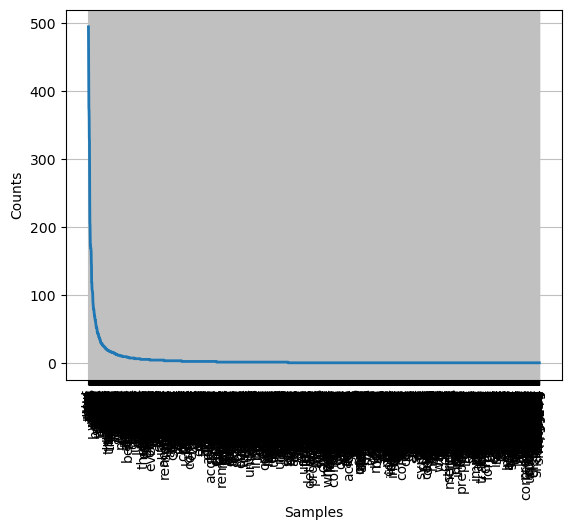

<Axes: xlabel='Samples', ylabel='Counts'>

In [170]:
nlp.plot()

In [172]:
nlp.tf_idf('thou', sonnets_corpus[3])

0.03059385219171728

In [174]:
TFIDF = []

for doc in sonnets_corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
    
    TFIDF.append(current)

In [176]:
TFIDF

[{'1': 0.04457480179127106,
  'from': 0.00819538706407361,
  'fairest': 0.03230671009994459,
  'creatures': 0.03844075594560782,
  'we': 0.023354489642612906,
  'desire': 0.024197942561235253,
  'increase': 0.03230671009994459,
  'that': 0.0028629252957960635,
  'thereby': 0.03844075594560782,
  'beauty': 0.011711332174418772,
  's': 0.016362535359654734,
  'rose': 0.028718523302527204,
  'might': 0.03365413073423858,
  'never': 0.021220312148658146,
  'die': 0.022584477456863972,
  'but': 0.00595526082515421,
  'as': 0.006606134170488832,
  'the': 0.006991742865939812,
  'riper': 0.03844075594560782,
  'should': 0.014775723649797833,
  'by': 0.015266643053415789,
  'time': 0.011498079505577529,
  'decease': 0.03485256914819044,
  'his': 0.01759117406334653,
  'tender': 0.05743704660505441,
  'heir': 0.03485256914819044,
  'bear': 0.021876134911080463,
  'memory': 0.02735435799432138,
  'thou': 0.011154572657511078,
  'contracted': 0.03844075594560782,
  'to': 0.0018883532993023968,
  

### Q1.7. Using nltk.util's ngrams module, find the 4-grams of the sonnetsvariable.

In [179]:
def get_ngrams(sonnets, length):
    from nltk.util import ngrams
    
    n_grams = ngrams(tokenize(sonnets), length)
    return [' '.join(grams) for grams in n_grams]

In [181]:
get_ngrams(sonnets.lower(), 4)

['1 from fairest creatures',
 'from fairest creatures we',
 'fairest creatures we desire',
 'creatures we desire increase',
 'we desire increase that',
 'desire increase that thereby',
 'increase that thereby beauty',
 'that thereby beauty s',
 'thereby beauty s rose',
 'beauty s rose might',
 's rose might never',
 'rose might never die',
 'might never die but',
 'never die but as',
 'die but as the',
 'but as the riper',
 'as the riper should',
 'the riper should by',
 'riper should by time',
 'should by time decease',
 'by time decease his',
 'time decease his tender',
 'decease his tender heir',
 'his tender heir might',
 'tender heir might bear',
 'heir might bear his',
 'might bear his memory',
 'bear his memory but',
 'his memory but thou',
 'memory but thou contracted',
 'but thou contracted to',
 'thou contracted to thine',
 'contracted to thine own',
 'to thine own bright',
 'thine own bright eyes',
 'own bright eyes feed',
 'bright eyes feed st',
 'eyes feed st thy',
 'feed 